### Lab-3 : Self-Practice

#### In this week, your self-practice task will consist to analyze the impact of class imballance on the performance of the logistic regression model.

#### Class imbalance is very common in real life. For example, in a classification problem to predict whether a person has a certain very rare disease, the dataset will always contain more negative samples than positive ones. This situation can have a significant impact on the performance of the model. You will analyze this situation in the case of the Titanic dataset used in the lab.

### 1. Load the titanic dataset and <b>PLOT</b> the proportion of positive and negative samples (survived vs non survived)

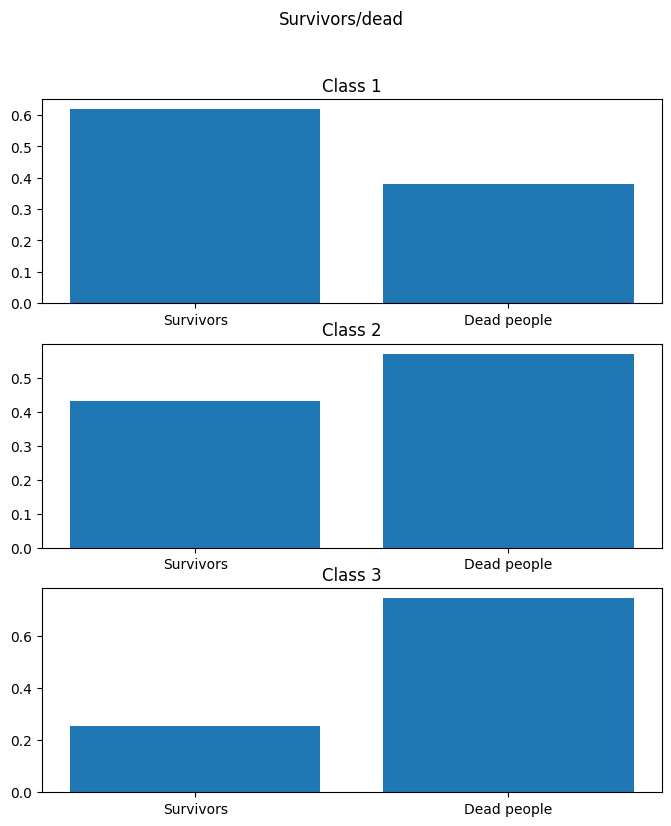

In [20]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
import pandas as pd
import matplotlib as mlb
from matplotlib import pyplot as plt 

def class_creator(clas):
    clas_survivors = sum(clas.survived == 1) / len(clas)
    clas_base = sum(clas.survived == 0) / len(clas)
    return [clas_survivors, clas_base]

dataset = pd.read_csv('titanic.csv')
dataset.sort_values('pclass')
pclass = dataset.groupby(dataset.pclass)

classes = []
for i in range(1, 4):
    classes.append(pclass.get_group(i))


class_list = []
for i in range(3):
    class_list.append(class_creator(classes[i]))


names = ["Survivors", "Dead people"]

fig, axes = plt.subplots(3, 1, figsize=(8, 9))

for i in range(3):
    axes[i].bar(names, class_list[i])
    axes[i].set_title(f"Class {i+1}")
    # axes[i].legend(loc = 'upper right')


fig.suptitle('Survivors/dead')
plt.show()

#### Preprocess the data as it has been done in the lab, feel free to adapt

In [47]:
#### preprocess the data
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler

# imputing missing values
dataset = pd.read_csv('titanic.csv')

# Dropping the names, since they are useless information in predicting the target.
dataset = dataset.drop('name', axis = 1)
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(dataset)
dataset = pd.DataFrame(imputer.transform(dataset), columns=dataset.columns)
dataset.head()

# one-hot-encode categorical features
def ohe_new_features(df, features_name, encoder):
    new_feats = encoder.transform(df[features_name])
    # create dataframe from encoded features with named columns
    new_cols = pd.DataFrame(new_feats, dtype=int, columns=encoder.get_feature_names(features_name))
    new_df = pd.concat([df, new_cols], axis=1)    
    new_df.drop(features_name, axis=1, inplace=True)
    return new_df

encoder = OneHotEncoder(sparse=False, drop=None)
f_names = ['sex', 'embarked']
encoder.fit(dataset[f_names])
dataset = ohe_new_features(dataset, f_names, encoder)

# feature scaling
scaler = MinMaxScaler()
scaler.fit(dataset)
dataset = pd.DataFrame(scaler.transform(dataset), columns=dataset.columns)

dataset.head()

c:\Users\user\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,survived,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
0,1.0,0.0,0.361142,0.000,0.000000,0.412503,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.009395,0.125,0.222222,0.295806,0.0,1.0,0.0,0.0,1.0
2,0.0,0.0,0.022924,0.125,0.222222,0.295806,1.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.373669,0.125,0.222222,0.295806,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,0.311036,0.125,0.222222,0.295806,1.0,0.0,0.0,0.0,1.0


## 2. Impact of class imballance. 
##### Now, you will `artificially` imbalance the dataset. From the original dataset, create different dataset with the following class representations (drop samples from one class): 
##### 1. 20% vs 80%
##### 2. 30% vs 70%
##### 3. 40% vs 60%

## Split each data into train and test set as in the lab; train logistic regression model for each setting and report (PLOT) the accuracy, precision, and recall of each model

In [58]:
### write your code here 

def calculate_proportion(positive_per, negative_per, correct_proportion):
    return (negative_per*correct_proportion)/positive_per


# finding correct proportions of positive samples:
dataset_positiff = dataset[dataset['survived'] == 1]
dataset_negatiff = dataset[dataset['survived'] == 0]
datpos = len(dataset_positiff)
datneg = len(dataset_negatiff)

prop_20_80 = calculate_proportion(datpos, datneg, 20/80)
prop_30_70 = calculate_proportion(datpos, datneg, 30/70)

dataset1 = pd.concat([dataset_positiff.sample(frac = prop_20_80), dataset_negatiff])
dataset2 = pd.concat([dataset_positiff.sample(frac = prop_30_70), dataset_negatiff])

dataset_reduced_negatiff = dataset_negatiff.sample(frac = 0.85)
length_neg = len(dataset_reduced_negatiff)
prop_40_60 = calculate_proportion(datpos, length_neg, 40/60)
dataset3 = pd.concat([dataset_positiff.sample(frac = prop_40_60), dataset_reduced_negatiff])



      survived  pclass       age  sibsp     parch      fare  sex_female  \
1205       1.0     1.0  0.223350  0.000  0.000000  0.014631         1.0   
362        1.0     0.5  0.436302  0.000  0.000000  0.040989         1.0   
660        1.0     1.0  0.298509  0.000  0.333333  0.037590         1.0   
181        1.0     0.0  0.611675  0.000  0.000000  0.050610         1.0   
936        1.0     1.0  0.323563  0.125  0.111111  0.042990         1.0   
...        ...     ...       ...    ...       ...       ...         ...   
841        0.0     1.0  0.210823  0.000  0.000000  0.015094         1.0   
463        0.0     0.5  0.273456  0.250  0.000000  0.061484         0.0   
811        0.0     1.0  0.599148  0.125  0.333333  0.067096         1.0   
206        0.0     0.0  0.549042  0.250  0.000000  0.175668         0.0   
920        0.0     1.0  0.298509  0.000  0.000000  0.015127         0.0   

      sex_male  embarked_C  embarked_Q  embarked_S  
1205       0.0         0.0         0.0        

"x_train, x_test, y_train, y_test = train_test_split(dataset1.loc[:, 'pclass':], dataset1['survived'],\n                                                    test_size=0.2, stratify=dataset1['survived'])\n\n\nclf = LogisticRegression(random_state=0).fit(x_train, y_train)\ny_test_pred = clf.predict(x_test)\n\nprint('Testing accuracy = {}'.format(metrics.accuracy_score(y_test, y_test_pred)))\nprint('Testing precision = {}'.format(metrics.precision_score(y_test, y_test_pred)))\nprint('Testing recall = {}'.format(metrics.recall_score(y_test, y_test_pred)))"

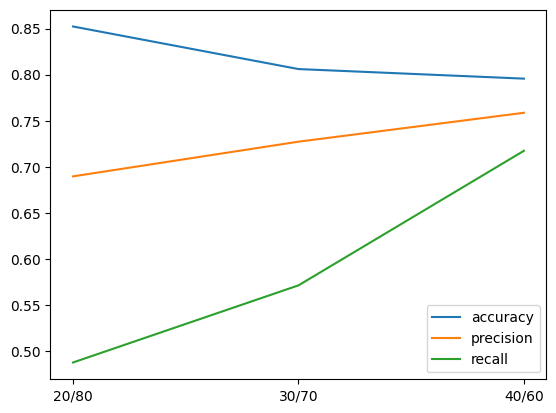

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

acc = []
prec = []
rec = []
def logistic_regression(db):
    x_train, x_test, y_train, y_test = train_test_split(db.loc[:, 'pclass':], db['survived'], test_size=0.2, stratify=db['survived'])

    clf = LogisticRegression(random_state=0).fit(x_train, y_train)
    y_test_pred = clf.predict(x_test)

    testing_accuracy = metrics.accuracy_score(y_test, y_test_pred)
    testing_precision = metrics.precision_score(y_test, y_test_pred)
    testing_recall = metrics.recall_score(y_test, y_test_pred)
    acc.append(testing_accuracy)
    prec.append(testing_precision)
    rec.append(testing_recall)
    return (testing_accuracy, testing_precision, testing_recall)

tuple1 = logistic_regression(dataset1)
tuple2 = logistic_regression(dataset2)
tuple3 = logistic_regression(dataset3)

X_plt = ['20/80', '30/70', '40/60']

plt.plot(X_plt, acc, label = 'accuracy')  
plt.plot(X_plt, prec, label = 'precision')   
plt.plot(X_plt, rec, label = 'recall')
plt.legend()

## 3. Analyse the class-wise accuracy. 
#### For each model, plot (bar plots) the class-wise accuracy, i.e., the accuracy for each class.

<function matplotlib.pyplot.show(close=None, block=None)>

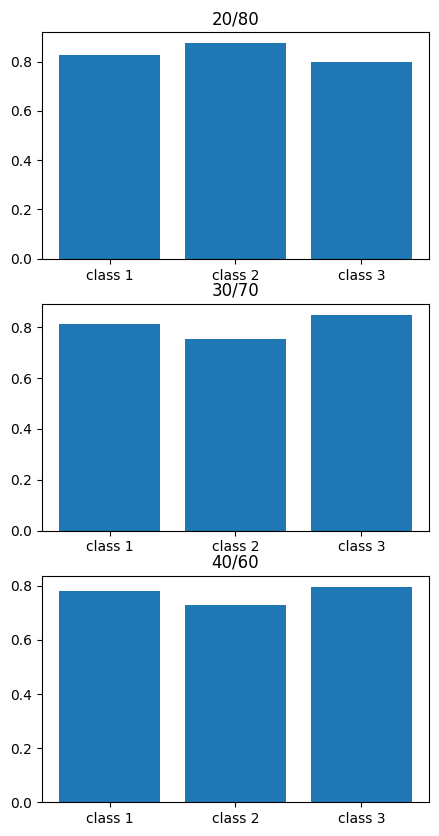

In [79]:
### write your code here. Load the dataset and plot (barplot) proportion of each class 
import pandas as pd
import matplotlib as mlb
from matplotlib import pyplot as plt 

datasets = [dataset1, dataset2, dataset3]

fig, axes = plt.subplots(3, 1, figsize=(5, 10))
numerator = 20
denominator = 80
for i in range(3):
    
    df = datasets[i]
    # print(df['pclass'].unique())
    df.sort_values('pclass')
    class_groups = df.groupby(df.pclass)
    classes = []
    
    for j in range(1, 4):
        n = 0
        classes.append(class_groups.get_group(n))
        n += 0.5
    accs = []
    names = ['class 1', 'class 2', 'class 3']
    for c in classes:
        cum = logistic_regression(c)
        accs.append(cum[0])
    axes[i].bar(names, accs)
    axes[i].set_title(f'{numerator}/{denominator}')

    numerator += 10
    denominator -= 10
plt.show

## 4. Report 
### Write a small report (few sentences) to discuss from your analysis, the impact of class imballance on logistic model's performance 

As we can see from the chart comparing plots of accuracy, precision, and recall, the increase in positive/negative proportion has caused slight reduction of accuracy, slight increase of precision and large increase of recall. This means that the prediction is biased towards the majority class. Large increase in recall can be e